In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
from math import floor
from scipy.optimize import curve_fit as cf
import scipy.stats as stats

plt.style.use('figuras_lucio.mplstyle')


In [3]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

In [5]:
from statsmodels.api import tsa

autocorr = lambda x : tsa.acf(x,nlags = len(x))

In [6]:
def t_coherencia(df):
    acorr = autocorr(df.Tiempo) #Tiempo porque tenemos mal indexados los datos
    acorr = acorr/np.max(acorr)
    tiempos = np.array(df.Datos-df.Datos[0])

    index = np.where(acorr < max(acorr/2))[0][0]

    tau = tiempos[index]  
    
    plt.plot(tiempos,acorr,zorder=1,label='Datos')
    plt.scatter(tiempos[index],acorr[index],c='crimson',zorder=2,label=f'\u03C4 = {np.round(tau,dcmls(tau))}')
    plt.grid()
    plt.xlabel('t [s]')
    plt.ylabel('g [u.a.]')
#    plt.legend()
    plt.tight_layout()
#    plt.show()
    
    return tau

['iteración 0 Medición nro 10.csv', 'iteración 0 Medición nro 100.csv', 'iteración 0 Medición nro 101.csv', 'iteración 0 Medición nro 102.csv', 'iteración 0 Medición nro 103.csv', 'iteración 0 Medición nro 104.csv', 'iteración 0 Medición nro 105.csv', 'iteración 0 Medición nro 106.csv', 'iteración 0 Medición nro 107.csv', 'iteración 0 Medición nro 108.csv', 'iteración 0 Medición nro 109.csv', 'iteración 0 Medición nro 11.csv', 'iteración 0 Medición nro 110.csv', 'iteración 0 Medición nro 111.csv', 'iteración 0 Medición nro 112.csv', 'iteración 0 Medición nro 113.csv', 'iteración 0 Medición nro 114.csv', 'iteración 0 Medición nro 115.csv', 'iteración 0 Medición nro 116.csv', 'iteración 0 Medición nro 117.csv', 'iteración 0 Medición nro 118.csv', 'iteración 0 Medición nro 119.csv', 'iteración 0 Medición nro 12.csv', 'iteración 0 Medición nro 120.csv', 'iteración 0 Medición nro 121.csv', 'iteración 0 Medición nro 122.csv', 'iteración 0 Medición nro 123.csv', 'iteración 0 Medición nro 124.

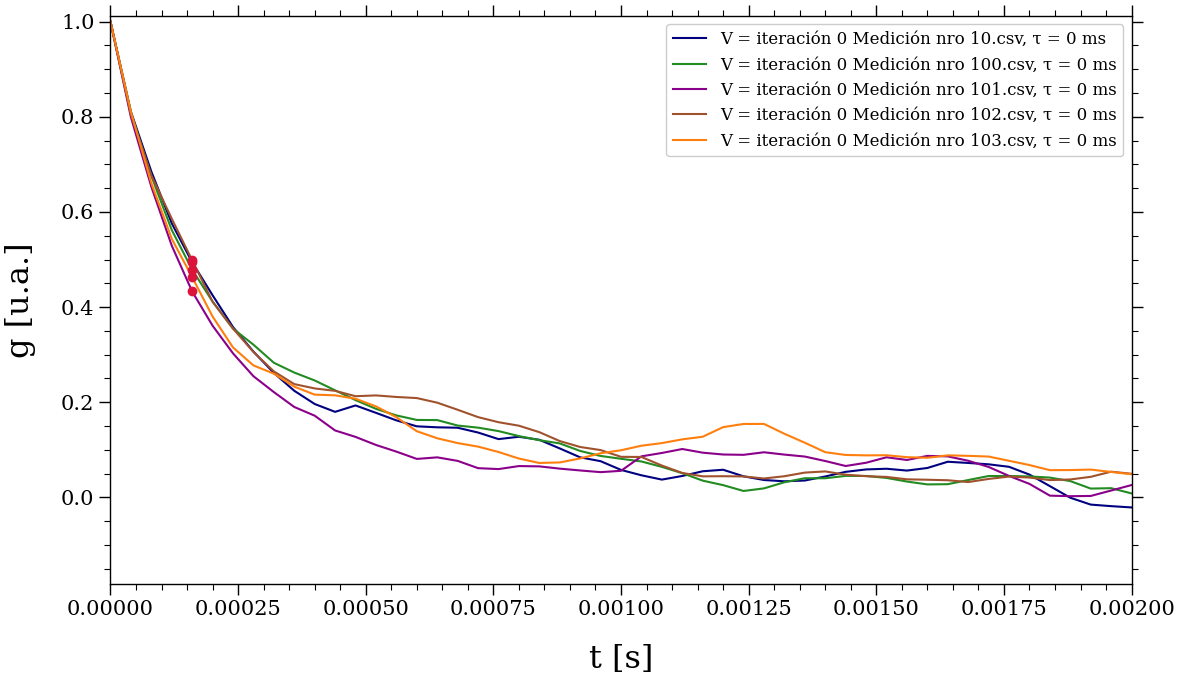

In [18]:
voltajes = os.listdir('Clase 01-11/Mediciones con laser/Iteración 0')
voltajes.sort()
voltajes = voltajes[2:]
print(voltajes)
c_list = ['navy','forestgreen','darkmagenta','sienna','tab:orange']


for i,voltaje in enumerate(voltajes[0:5]):
    df = pd.read_csv(f'Clase 01-11/Mediciones con laser/Iteración 0/{voltaje}')

    acorr = autocorr(df.Tiempo)
    acorr = acorr/np.max(acorr)
    tiempos = np.array(df.Datos-df.Datos[0])

    index = np.where(acorr < max(acorr/2))[0][0]

    tau = tiempos[index]  

    if voltaje != '5.1 V':
        next
        plt.plot(tiempos,acorr,zorder=1,c=c_list[i],label=f'V = {voltaje}, \u03C4 = {int(np.round(tau*1000,-1))} ms')
    else:
        plt.plot(tiempos,acorr,zorder=1,c=c_list[i],label=f'V = {voltaje}, \u03C4 = {int(np.round(tau*1000,0))} ms')
    plt.scatter(tiempos[index],acorr[index],c='crimson',zorder=2)#,label=f'\u03C4 = {np.round(tau,dcmls(tau))}')
    
    print(tau)

plt.grid()
plt.xlabel('t [s]')
plt.ylabel('g [u.a.]')
plt.legend(fontsize=12)
plt.xlim(0,0.002)
plt.tight_layout()
# plt.savefig('plots/autocorr.png')